# Classificazione e Sentiment analysis su post provenienti da Reddit

**Studente:** Rosario Cannavò
<br>
**Matricola:** 1000004011
<br>
**A.A:** 2021/2022

## 1. Introduzione

Come già noto, Reddit è un social network caratterizzato da una struttura simile ai primissimi forum che popolavano internet fino a qualche anno fa e fornivano un pensiero attuale sui vari topic che affrontavano. Riprendendo questo concetto si vuole addestrare un algoritmo di machine learning che opportunamente addestrato e ottimizzato riesca a classificare la categoria di un post. Successivamente si vuole anche predirre il linguaggio di cui si sta parlando tramite l'uso dello stesso algoritmo ma addestrato diversamente per portare a termine questa tipologia di task. Nello specifico, verranno allenate  due istanze dell'algoritmo su post che provengono da vari subreddit che trattano di linguaggi di programmazione e da altri il cui argomento di interesse è diverso dal mondo della programmazione e dell'informatica in generale. In questo modo alla fine del training i due algoritmi saranno in grado di classificare correttamente i post. 
L'algoritmo utilizzato sarà il K-Nearest Neighbour e delle sue ottimizzazioni. I punti su cui lavorerà l'algoritmo saranno i vettori bag of words opportunamente estrapolati dai post di esempio. 
Dopo aver effettuato la classificazione, una seconda parte del progetto consisterà nel calcolare il sentiment dei post che parlano di programmazione per osservare di quali linguaggi si parla positivamente e di quali negativamente. Per fare ciò verrà utilizzato l'algoritmo VADER e in conclusione verrà calcolata la media delle valutazioni per ogni linguaggio, in questo modo sarà possibile capire se generalmente gli utenti di Reddit utilizzano il social network per esporre difetti e lamentele dei vari linguaggi o per elogiarne le funzionalità e le potenzialità, potremo inoltre capire quale linguaggio è maggiormente supportato dai suoi utenti.  

Per accedere ai contenuti dei vari subreddit utilizzeremo le API di Reddit fornite dal wrapper Praw. Come citato nel tutorial ([Tutorial Reddit](https://github.com/rosariocannavo/TutorialSocialMediaManagement)), per avere accesso sarà necessario registrarsi a Reddit come programmatori e riscattare i token di identificazione.

In [1]:
import praw 
reddit = praw.Reddit(client_id = 'tvHkTZ-wanEENSM1GSdQ5w',
                     client_secret = 'kw-wzX7cNVvYYi8VBCjxjQp5C2Pn9Q',
                     username = 'tutorialSocialMedia',
                     password = 'password123',
                     user_agent = 'tutorialpython'
                    )

## 2. Estrazione dei dati e creazione del dataset

Dopo aver ottenuto l'oggetto **reddit**, potremo esplorare i vari subreddit del social network utilizzando i metodi del wrapper. Nelle prossime righe sarà effettuata l'estrapolazione dei post più recenti in modo da costruire un dataset di partenza su cui addestrare e testare gli algoritmi che saranno utilizzati.
E' importante notare che il numero di post ritornati dal metodo "hot" non è fisso, per tale motivo è stabilito un limite superiore (posto a 5000) per evitare di appesantire e rallentare eccessivamente l'algoritmo.

I post sono nello specifico ottenuti dai subreddit: "Python", "C++", "Sushi", "Guitar", "Kotlin", "nba","news", "Europe", "Angular", "Motorcycles","PHP", "Damnthatsinteresting", "Golang","AskReddit" e "Music", "World news", "CSS" e "Java".
Inoltre, conoscendo la provenienza dei post durante la fase di costruzione del dataset, è stato assegnato ad ognuno di essi, la classe di appartenenza "reale". Le possibili classi sono "**programming**" e "**non programming**", ad indicare la natura del post. Allo stesso modo saremo in grado di assegnare ad ogni osservazione il linguaggio di cui tratta. 

In [2]:
subred = reddit.subreddit("Python")

In [3]:
import pandas as pd
df1 = []
for post in subred.hot(limit=5000):
    df1.append([post.title[:40], post.selftext, "programming", "Python"])
df1 = pd.DataFrame(df1, columns=["title","text","class", "language"])

In [4]:
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     461 non-null    object
 1   text      461 non-null    object
 2   class     461 non-null    object
 3   language  461 non-null    object
dtypes: object(4)
memory usage: 14.5+ KB


Prendiamo adesso dei post da un altro subreddit che parla di programmazione, ad esempio il subreddit di C++:

In [5]:
subred = reddit.subreddit("cpp")  

In [6]:
df2 = []
for post in subred.hot(limit=5000):
    df2.append([post.title[:40], post.selftext, "programming", "C++"])
df2 = pd.DataFrame(df2, columns=["title","text","class", "language"])

In [7]:
df2.head()

,title,text,class,language
0,C++ Jobs - Q1 2022,Rules For Individuals\n---------------------\n...,programming,C++
1,C++ Show and Tell - Experiment,"Recently, we've been getting an uptick of ""loo...",programming,C++
2,C++'s Superpower - Matt Godbolt - CPPP 2,,programming,C++
3,P2300 (Sender/Receiver) is DEAD in the w,"""No consensus. There is sustained strong oppos...",programming,C++
4,Constant references are not always your,,programming,C++


Prendiamo adesso dei post da un subreddit che parla di sushi:

In [8]:
subred = reddit.subreddit("sushi")  

df3 = []
for post in subred.hot( limit=5000):
    df3.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df3 = pd.DataFrame(df3, columns=["title","text","class", "language"])

In [9]:
df3.head()

,title,text,class,language
0,First time making sushi fully by myself!,,non programming,Not a language
1,Made some sushi for dinner.,,non programming,Not a language
2,Epic sushi night!,,non programming,Not a language
3,Just an assortment from heaven,,non programming,Not a language
4,Hamachi,,non programming,Not a language


E dei post da un subreddit che parla di chitarre:

In [10]:
subred = reddit.subreddit("Guitar")  

df4 = []
for post in subred.hot( limit=5000):
    df4.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df4 = pd.DataFrame(df4, columns=["title","text","class", "language"])

In [11]:
df4.head()

,title,text,class,language
0,[DISCUSSION] - February 2022 - NO STUPID,\n\nGood Day [r/Guitar](https://www.reddit.co...,non programming,Not a language
1,[PLAY] R/GUITAR - Players Spotlight - Fe,Hello [r/Guitar](https://www.reddit.com/r/Guit...,non programming,Not a language
2,[QUESTION] What popular guitar / guitar,"For me, it's the SG. They're popular with some...",non programming,Not a language
3,[NEWBIE] Believe the hype - JustinGuitar,So... I've been playing for more than a decade...,non programming,Not a language
4,[DISCUSSION] What popular guitar model d,"It doesn't have to be based on sound only, cou...",non programming,Not a language


In [12]:
subred = reddit.subreddit("Kotlin")  

df5 = []
for post in subred.hot( limit=5000):
    df5.append([post.title[:40], post.selftext, "programming", "Kotlin"])
df5 = pd.DataFrame(df5, columns=["title","text","class", "language"])

In [13]:
df5.head()

,title,text,class,language
0,"Enum.hashCode isn't stable, so why is it",I ran into [this footgun](https://madhead.me/p...,programming,Kotlin
1,Trying Insertion sort in Kotlin,"Can someone please review my code, why its not...",programming,Kotlin
2,"Fake It, but Don't Make It",More exploration of Test Driven Development an...,programming,Kotlin
3,Experiences with Kotlin OR Frameworks,We're a small team working on Spring Boot-base...,programming,Kotlin
4,Exploring Photo Picker in Android 13,,programming,Kotlin


In [14]:
subred = reddit.subreddit("nba")  

df6 = []
for post in subred.hot( limit=5000):
    df6.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df6 = pd.DataFrame(df6, columns=["title","text","class", "language"])

In [15]:
df6.head()

,title,text,class,language
0,Daily Discussion Thread + Game Thread In,"# Game Threads Index (February 15, 2022):\n\n|...",non programming,Not a language
1,[SERIOUS NEXT DAY THREAD] Post-Game Disc,"Here is a place to have in depth, x's and o's,...",non programming,Not a language
2,[Fischer] Durant and Nash wanted a free-,https://bleacherreport.com/articles/2953512-in...,non programming,Not a language
3,James Harden teaching Joel Embiid how to,,non programming,Not a language
4,Harden on if Kyrie's vax situation impac,[Source](https://twitter.com/JoePantorno/statu...,non programming,Not a language


In [16]:
subred = reddit.subreddit("news")  

df7 = []
for post in subred.hot( limit=5000):
    df7.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df7 = pd.DataFrame(df7, columns=["title","text","class", "language"])

In [17]:
df7.head()

,title,text,class,language
0,FBI: Americans Lost $1 Billion to Romanc,,non programming,Not a language
1,Sandy Hook families settle with gun make,,non programming,Not a language
2,Long Island Man Claims Cops Ripped Off H,,non programming,Not a language
3,Alexei Navalny faces 15 more years in pr,,non programming,Not a language
4,Scientists have possibly cured HIV in a,,non programming,Not a language


In [18]:
subred = reddit.subreddit("europe")  

df8 = []
for post in subred.hot( limit=5000):
    df8.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df8 = pd.DataFrame(df8, columns=["title","text","class", "language"])

In [19]:
df8.head()

,title,text,class,language
0,What happened in your country this week?,**Welcome to the weekly European news gatherin...,non programming,Not a language
1,Ukraine-Russia Conflict Megathread 4,‎As news of the confrontation between Ukraine ...,non programming,Not a language
2,"""When a slave sets foot in Serbia, he/sh",,non programming,Not a language
3,A random fact I recently noticed: Italy,,non programming,Not a language
4,Belgium approves four-day week and gives,,non programming,Not a language


In [20]:
subred = reddit.subreddit("angular")  

df9 = []
for post in subred.hot( limit=5000):
    df9.append([post.title[:40], post.selftext, "programming", "Angular"])
df9 = pd.DataFrame(df9, columns=["title","text","class", "language"])

In [21]:
df9.head()

,title,text,class,language
0,Angular 12 in depth,,programming,Angular
1,How to Contribute to Angular Material —,,programming,Angular
2,RxJS in Angular: from beginner to advanc,,programming,Angular
3,Is it possible to get webpack.config.js,"I know how to custom webpack, but I still want...",programming,Angular
4,Approach for Creating a Landing Page,Hi. I'm fairly new with Angular. I'm creating ...,programming,Angular


In [22]:
subred = reddit.subreddit("Motorcycles")  

df10 = []
for post in subred.hot( limit=5000):
    df10.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df10 = pd.DataFrame(df10, columns=["title","text","class", "language"])

In [23]:
df10.head()

,title,text,class,language
0,REMINDER: Riding season is almost here!,# [Quick Link To Current Superthread](https://...,non programming,Not a language
1,Purchase Advice Superthread,# PURCHASE ADVICE SUPERTHREAD!\n\nA dedicated ...,non programming,Not a language
2,body position practice,,non programming,Not a language
3,Master of aquaplanning,,non programming,Not a language
4,Anyone have ideas about my aftermarket t,,non programming,Not a language


In [24]:
subred = reddit.subreddit("PHP")  

df11 = []
for post in subred.hot( limit=5000):
    df11.append([post.title[:40], post.selftext, "programming", "PHP"])
df11 = pd.DataFrame(df11, columns=["title","text","class", "language"])

In [25]:
df11.head()

,title,text,class,language
0,"Weekly ""ask anything"" thread",Hey there!\n\nThis subreddit isn't meant for h...,programming,PHP
1,PHP Benchmarks (2022) for 14 different P,I'm back almost a year later with a new round ...,programming,PHP
2,novinha do face http://facebookfotosevid,,programming,PHP
3,[need help] From Go to PHP,Hi. I've been developing in Go for over 6 year...,programming,PHP
4,Integrate Firebase web notification in t,Web notifications are messages sent to a visit...,programming,PHP


In [26]:
subred = reddit.subreddit("Damnthatsinteresting")  

df12 = []
for post in subred.hot( limit=5000):
    df12.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df12 = pd.DataFrame(df12, columns=["title","text","class", "language"])

In [27]:
df12.head()

,title,text,class,language
0,Map shows Netherlands progress in flood,,non programming,Not a language
1,Women who previously worked in Clinical,,non programming,Not a language
2,This Victorian Invention Saved Thousands,,non programming,Not a language
3,Digital artists recreated the changes of,,non programming,Not a language
4,3D modelling just by walking around the,,non programming,Not a language


In [28]:
subred = reddit.subreddit("golang")  

df13 = []
for post in subred.hot( limit=5000):
    df13.append([post.title[:40], post.selftext, "programming", "Go"])
df13 = pd.DataFrame(df13, columns=["title","text","class", "language"])

In [29]:
df13.head()

,title,text,class,language
0,CloverDB,"Hi, all! I wrote a storage project in Golang. ...",programming,Go
1,Continuous Build and Deployment of Go Ap,,programming,Go
2,Yet another graphics library but for ter,,programming,Go
3,mature alternative for webview?,I was playing around with [webview](https://gi...,programming,Go
4,log in and modules I could make use of,Hi fellow Gophers! I'm a new gopher who is sti...,programming,Go


In [30]:
subred = reddit.subreddit("AskReddit")  

df14 = []
for post in subred.hot( limit=5000):
    df14.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df14 = pd.DataFrame(df14, columns=["title","text","class", "language"])

In [31]:
df14.head()

,title,text,class,language
0,What’s one thing your partner doesn’t kn,,non programming,Not a language
1,What makes you nope out of reading a lon,,non programming,Not a language
2,What pisses you off instantly?,,non programming,Not a language
3,What’s the most beautiful word in the wo,,non programming,Not a language
4,What's the most uncomfortable compliment,,non programming,Not a language


In [32]:
subred = reddit.subreddit("Music")  

df15 = []
for post in subred.hot( limit=5000):
    df15.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df15 = pd.DataFrame(df15, columns=["title","text","class", "language"])

In [33]:
df15.head()

,title,text,class,language
0,"what’s up, reddit? my name is Jeris John",rock music has been stuck in the mud for the ...,non programming,Not a language
1,What's your favorite one hit wonder? Min,I know it's just a lame pop song but man is it...,non programming,Not a language
2,What album do you wish you could wipe fr,"Mine would be OK Computer, with Yankee Hotel F...",non programming,Not a language
3,"60's Los Angeles, Psychedelics, And Radi","Hello, Reddit. Welcome to my radio station, SO...",non programming,Not a language
4,Why I can no longer support Kanye West.,I hope this counts as legitimate discussion. I...,non programming,Not a language


In [34]:
subred = reddit.subreddit("worldnews")  

df16 = []
for post in subred.hot( limit=5000):
    df16.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df16 = pd.DataFrame(df16, columns=["title","text","class", "language"])

In [35]:
df16.head()

,title,text,class,language
0,r/worldnews Live Thread: Ukraine-Russia,,non programming,Not a language
1,Russian media reporting ‘thwarted terror,,non programming,Not a language
2,Putin Claims 'Genocide' Happening in Don,,non programming,Not a language
3,Ukraine reports cyber attack on defence,,non programming,Not a language
4,Russia says it is pulling back some of i,,non programming,Not a language


In [36]:
subred = reddit.subreddit("css")  

df17 = []
for post in subred.hot( limit=5000):
    df17.append([post.title[:40], post.selftext, "programming", "CSS"])
df17 = pd.DataFrame(df17, columns=["title","text","class", "language"])

In [37]:
df17.head()

,title,text,class,language
0,CSS FULL COURSE FOR BEGINNERS 2022 | HTM,,programming,CSS
1,Help me with Responsive CSS for this.,&#x200B;\n\nhttps://preview.redd.it/fec9v873zz...,programming,CSS
2,CSS Scroll Snap Slide Deck That Supports,,programming,CSS
3,Animated Responsive Landing Page with pu,,programming,CSS
4,Fancy letterhead style background,You know the feel of the paper when you handle...,programming,CSS


In [38]:
subred = reddit.subreddit("Java")  

df18 = []
for post in subred.hot( limit=5000):
    df18.append([post.title[:40], post.selftext, "programming", "Java"])
df18 = pd.DataFrame(df18, columns=["title","text","class", "language"])

In [39]:
df18.head()

,title,text,class,language
0,[PSA]/r/java is not for programming help,# /r/java is not for programming help or learn...,programming,Java
1,Log4j MEGATHREAD,"Upon special request of /u/bluegoliath, we are...",programming,Java
2,New loom EA builds with APIs for Structu,,programming,Java
3,Best way to prevent redundant null check,In large applications what is the best way to ...,programming,Java
4,There will be a third preview of type pa,,programming,Java


Dopo aver ottenuto i vari post provenienti dai subreddit presi in analisi ed averli memorizzati opportunamente in dei **Pandas dataframe**, costruiamo un unico dataset in grado di contenerli tutti in modo da lavorare più agilmente sui dati raccolti. Durante questa fase inoltre, saranno rimossi dal dataset tutti i record in cui non è presente del testo, infatti, in questi ultimi sono presenti immagini o link non utili ai fini dell'addestamento dell'algoritmo.

In [40]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18]
dataset = pd.concat(frames, ignore_index=True)
dataset = dataset.drop(dataset[dataset.text == ""].index)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5565 entries, 0 to 12926
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     5565 non-null   object
 1   text      5565 non-null   object
 2   class     5565 non-null   object
 3   language  5565 non-null   object
dtypes: object(4)
memory usage: 217.4+ KB


Visualizziamo adesso il numero di osservazioni organizzate per classe contenute all'interno del dataset:

In [41]:
dfobs = dataset.groupby('class').count()
dfobs.rename({'title': 'number_of_records'}, axis=1, inplace=True)
dfobs.drop(columns=['text','language'], inplace=True)
dfobs

,number_of_records
class,
non programming,2094
programming,3471


In [42]:
dflang = dataset.groupby('language').count()
dflang.rename({'title': 'number_of_records'}, axis=1, inplace=True)
dflang.drop(columns=['text','class'], inplace=True)
dflang

,number_of_records
language,
Angular,641
C++,395
CSS,359
Go,532
Java,179
Kotlin,637
Not a language,2094
PHP,425
Python,303


Una volta ottenuto il dataframe che rappresenta i dati raccolti, utilizziamo la libreria **sklearn**  che ci fornirà tutti gli strumenti per portare a termine il task di classificazione, dalla creazione dei set su cui lavorare, l'algoritmo vero e proprio e al calcolo delle misure di valutazione.

Come appena citato il primo passo da effettuare è quello di dividere il dataset in due parti, per fare ciò utilizziamo il **metodo holdout**, ovvero assegneremo al training set l'**X%** delle osservazioni e al test set il restante **100-X%** delle osservazioni. Nel nostro caso avremo che **X = 25%**.

In [43]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(1234)

train_set, test_set = train_test_split(dataset, test_size=0.25)
train_set.info(); print('\n'); test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4173 entries, 6387 to 6090
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4173 non-null   object
 1   text      4173 non-null   object
 2   class     4173 non-null   object
 3   language  4173 non-null   object
dtypes: object(4)
memory usage: 163.0+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 12450 to 4336
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1392 non-null   object
 1   text      1392 non-null   object
 2   class     1392 non-null   object
 3   language  1392 non-null   object
dtypes: object(4)
memory usage: 54.4+ KB


Osserviamo graficamente come sono disposte le osservazioni all'interno del training set, in genere è buona norma che il training set sia **bilanciato** ovvero che le osservazioni appartenenti all'insieme siano ripartite in egual misura in base alla loro classe. 

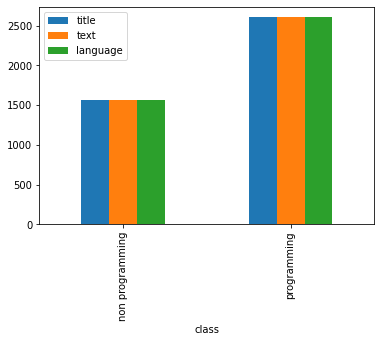

In [44]:
from matplotlib import pyplot as plt
train_set.groupby('class').count().plot.bar()
plt.show()

Possiamo adesso osservare parte dei due set per verificare che essi siano stati creati correttamente.

In [45]:
train_set.head()

,title,text,class,language
6387,Any other basic application codealong tu,"Hello, I have started to learn Angular. I am t...",programming,Angular
360,Python Project Template,I created a project template for my further ML...,programming,Python
4062,Ja Morant and Gary Payton II are tied fo,https://www.basketball-reference.com/leagues/N...,non programming,Not a language
6737,Should I wear motorcycle gears to Colleg,It's only a 200cc and I have been riding for 4...,non programming,Not a language
12682,Bytecode annotation processor,(Shameless plug)\n\nI've created an annotation...,programming,Java


In [46]:
test_set.head()

,title,text,class,language
12450,Why is Java templating/server rendering,In the last decade there has of course been a ...,programming,Java
5777,[ngstyle] working in dev mode but disapp,so pretty simple I'm' setting the background i...,programming,Angular
69,I made a wordle clone in python.,"So, I made a simple wordle clone in python whi...",programming,Python
414,Arcade 2.6.10 has been released,"Arcade, a library for creating 2D arcade games...",programming,Python
6191,5 Great SEO Ideas To Improve Angular Web,As an Angular developer we know how tough it i...,programming,Angular


## 3. Rappresentazione Bag of Word e creazione del vettore BOW

Dopo aver ottenuto i set su cui lavorare è necessario applicare ad essi una **funzione di trasformazione** che permetta di rappresentare in una forma comprensibile all'algoritmo.
A tal proposito utilizziamo la rappresentazione **Bag of Words** che dato un corpus di documenti (i nostri post) ritorna una rappresentazione che non considera l'ordine o il significato delle parole: dopo una fase di pre-processing in cui vengono applicati alcuni step della **NLP pipeline** ad ogni post verrà associato un ***vettore di lunghezza fissa*** che lo rappresenta in cui saranno evidenziati soltanto i termini appartenenti a quello specifico documento.
Per effettuare quest'operazione utilizzeremo ancora **sklearn** e in particolare l'oggetto **CountVectorizer**.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [48]:
x_train = count_vect.fit_transform(train_set['text'])
x_train

<4173x27849 sparse matrix of type '<class 'numpy.int64'>'
	with 296404 stored elements in Compressed Sparse Row format>

Come possiamo notare, dopo l'applicazione della funzione, il training set verrà rappresentato attraverso una **sparse matrix** e non più come un **dataframe**, questo per ottimizzare lo spazio occupato.

In [49]:
print(len(count_vect.vocabulary_))

27849


Un'altra importante informazione da visualizzare è la lunghezza del **vocabolario**, essa infatti rappresenta il numero di token estratti dal corpus. A partire da questa grandezza, ogni post verrà rappresentato tramite un vettore di lunghezza pari alla grandezza del vocabolario.

## 4. Classificazione kNN con k pari 1

L'algoritmo **kNN** nasce come ottimizzazione dell'algoritmo **Neirest Neighbour**, infatti **k** è un **iperparametro** che rappresenta il numero di vicini nell'intorno dell'osservazione da classificare che verranno considerati per stimare la classe del dato in input.

Come prima cosa applichiamo il kNN nella sua versione **Naive** (k=1) per osservarne i risultati.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  #impostiamo il numero di vicini pari a uno

Effettuiamo il training tramite la funzione **fit** fornita da sklearn:

In [51]:
knn.fit(x_train, train_set['class'])

KNeighborsClassifier(n_neighbors=1)

Dopo aver addestrato il classificatore è possibile effettuare una prova applicandolo su un'osservazione del test set che non ha mai visto e confrontandola con la classe di appartenenza reale. L'algoritmo è addestrato sulla rappresentazione bow dei post, sarà dunque prima necessario trasformare anche l'osservazione in input opportunamente:

In [52]:
test = test_set.iloc[1]['text']
trueclass = test_set.iloc[1]['class']
test

'so pretty simple I\'m\' setting the background image like this\n\n     <div class="image" [ngStyle]="{\'background-image\': \'url(\' + this.http.domain + \'/static\' +product.Webps![0].img_link +\')\'}"></div>\n\nworks great but after build and deploy it is just gone any ideas?'

In [53]:
feats=count_vect.transform([test])
feats

<1x27849 sparse matrix of type '<class 'numpy.int64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [54]:
print("classe predetta:", knn.predict(feats)[0])
print("classe reale:", trueclass)

classe predetta: programming
classe reale: programming


Calcoliamo adesso la predizione su tutti gli elementi del test set per poi poter ricavare delle **misure di performance** del classificatore:

In [55]:
x_test = count_vect.transform(test_set['text'])
y_test_pred = knn.predict(x_test)

Come misura utilizzeremo l'**f1-score**, una misura ottenuta come **la media armonica di precision e recall** che fornisce una **visuale completa** della bontà del classificatore.

In [56]:
from sklearn.metrics import f1_score

f1_scores = f1_score(test_set['class'], y_test_pred, average=None, labels=['programming'])[0]
print("F1-score K = 1:", f1_scores)

F1-score K = 1: 0.7508813160987073


Per avere contezza degli errori del classificatore, essendo agevolati dalla situazione binaria in cui ci troviamo è possibile visualizzare la **confusion matrix** che fornisce la quantità di osservazioni classificate correttamente e la tipologia di errori commessi, in genere si preferiscono valori alti sulla diagonale principale e viceversa valori bassi sulla diagonale secondaria. Infatti, essendo rappresentate sull'asse delle ascisse i valori **predetti** e su quella delle ordinate i valori **reali** le osservazioni per cui i due valori coincidono (diagonale principale) saranno quelle classificate correttamente.

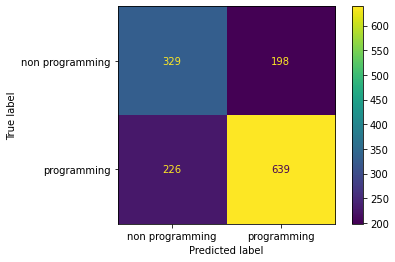

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_pred)

## 5. Stima del K migliore

Come detto prima, k è un iperparametro che va ottimizzato sulla base di un **validation set**, infatti al fine di ottenere il massimo rendimento dal classificatore, k va scelto con criterio. Per effettuare il **"tuning"** di k, verra usata ancora sklearn, in particolare tramite il metodo **GridSearchCV** verranno testati vari k (***da 1 a 20***): il k che otterrà f1score migliore verrà scelto come iperaparametro.

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train,train_set['class'])
bestK= gs.best_params_['n_neighbors']

Cerchiamo adesso un **riscontro grafico** che ci permetta di osservare l'andamento dell'algoritmo al variare di k.

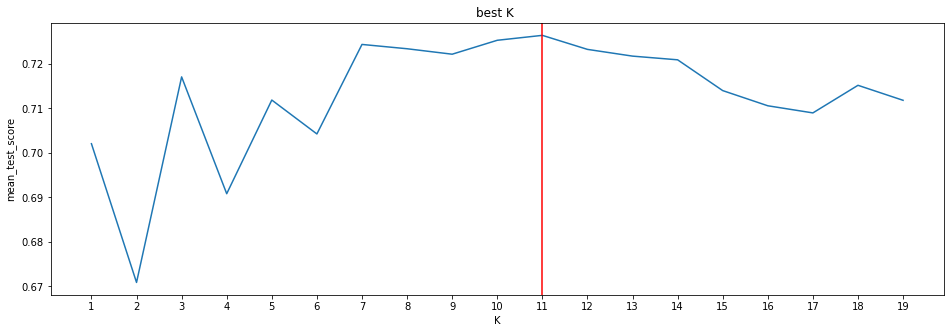

In [59]:
import matplotlib.pyplot as plt 
asseY = gs.cv_results_['mean_test_score']
asseX = list(range(1,20))
plt.figure(figsize = (16,5))
plt.plot(asseY)
plt.xticks(np.arange(len(asseY)), np.arange(1, len(asseY)+1)) #tick asse X

plt.title("best K ")
plt.xlabel("K")
plt.ylabel("mean_test_score")
max_value = max(asseY) 
max_index =np.where(asseY == max_value) #cerco dove il valore è max per stampare poi la linea rossa
plt.axvline(max_index, color = "r")
plt.show()

Possiamo adesso visualizzare l'output ottenuto dal tuning, ovvero il k migliore:

In [60]:
print("k migliore:", bestK)

k migliore: 11


Dopo aver stimato il parametro k ideale rieffettuiamo la classificazione e calcoliamo l'f1score e la matrice di confusione nuovamente:

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, train_set['class'])
x_test = count_vect.transform(test_set['text'])
y_test_pred2 = knn.predict(x_test)
f1_scores = f1_score(test_set['class'], y_test_pred2, average=None, labels=['programming'])[0]
print("F1-score k =",bestK,":", f1_scores)

F1-score k = 11 : 0.7770845150311968


Matrice di confusione con k ottimale:

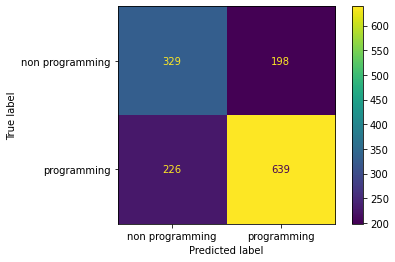

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_pred)

## 6. Ottimizzazione tramite rappresentazione TF-IDF

Si cerca adesso ad ottimizzare la rappresentazione dei dati a disposizione allo scopo di migliorare le performance del classificatore.
L'obiettivo è quello di fornire a parole meno frequenti (e quindi più significative) un peso maggiore e viceversa a parole più frequenti (meno significative) un peso minore. Questa tipologia di rappresentazione prende il nome di **TF-IDF** e permette di ottenere una classificazione più accurata e meno sensibile agli **outliers**.
Per realizzare quanto detto prima, verrà istanziato un nuovo classificatore che sarà però addestrato sui dati rappresentati tramite l'oggetto **TfidfTransformer** fornito da sklearn che calcola la rappresentazione **TF-IDF** dei post.

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False)

x_train_counts = count_vect.fit_transform(train_set['text'])
x_train_tf_idf = tf_transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(test_set['text'])
x_test_tf_idf = tf_transformer.fit_transform(x_test_counts)

Dopo aver ottenuto la rappresentazione tf-idf dei dati, ricerchiamo il k migliore per poi applicare l'algoritmo kNN:

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train_tf_idf,train_set['class'])
bestK2= gs.best_params_['n_neighbors']

In [65]:
print("k migliore tf-idf:", bestK2)

k migliore tf-idf: 8


Addestriamo ora l'algoritmo utilizzando il k migliore

In [66]:
classifier = KNeighborsClassifier(n_neighbors=bestK2)
classifier.fit(x_train_tf_idf, train_set['class'])

KNeighborsClassifier(n_neighbors=8)

calcoliamo l'**f1-score**:

In [67]:
y_test_preds = classifier.predict(x_test_tf_idf)
f1_scores=f1_score(test_set['class'],y_test_preds, average=None, labels=['programming'])[0]
print("f1-score tf-idf:",f1_scores)

f1-score tf-idf: 0.8877887788778879


Anche in questo caso è possibile ottenere la matrice di confusione:

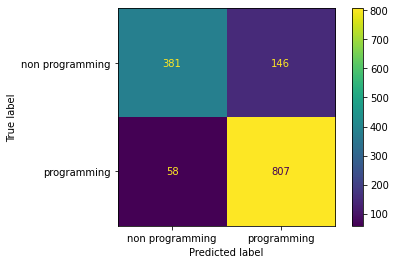

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_preds)

## 7. Confronto tra i vari classificatori

E' possibile adesso confrontare i tre risultati ottenuti visualizzando la **curva PR**, ovvero la curva che mette in realzione **precision** e **recall**. Prima di fare ciò è però necessario ai fini della rappresentazione, mappare i nomi delle classi, avremo dunque:
* **non programming** = 0;
* **programming** = 1;

Di seguito il processo di mapping e il plot della curva PR:

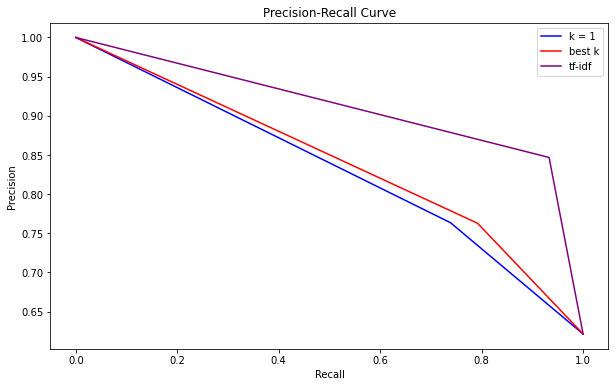

In [69]:
#map delle etichette reali
test_zero_one = test_set.copy()
test_zero_one = test_zero_one.replace(to_replace=['non programming', 'programming'], value=[0, 1])

#map delle varie predizioni
y_preds_zero_one_tf_idf = y_test_preds.copy()
for i in range(y_preds_zero_one_tf_idf.size):
    if(y_preds_zero_one_tf_idf[i] == 'programming'):
        y_preds_zero_one_tf_idf[i] = 1
    else:
        y_preds_zero_one_tf_idf[i] = 0

        
y_preds_zero_one_bestk = y_test_pred2.copy()
for i in range(y_preds_zero_one_bestk.size):
    if(y_preds_zero_one_bestk[i] == 'programming'):
        y_preds_zero_one_bestk[i] = 1
    else:
        y_preds_zero_one_bestk[i] = 0
        
y_preds_zero_one_k1 = y_test_pred.copy()
for i in range(y_preds_zero_one_k1.size):
    if(y_preds_zero_one_k1[i] == 'programming'):
        y_preds_zero_one_k1[i] = 1
    else:
        y_preds_zero_one_k1[i] = 0  
        
#generazione valori x,y della curva PR e plot
from sklearn.metrics import precision_recall_curve
from matplotlib.pyplot import figure
figure(figsize=(10, 6))

precision_k1, recall_k1, thresholds_k1 = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_k1)
plt.plot(recall_k1, precision_k1, color='blue', label='k = 1')

precision_bestk, recall_bestk, thresholds_bestk = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_bestk)
plt.plot(recall_bestk, precision_bestk, color='red', label='best k')

precision_tfidf, recall_tfidf, thresholds_tfidf = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_tf_idf)
plt.plot(recall_tfidf, precision_tfidf, color='purple', label='tf-idf')

plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.legend()
plt.show()

E' possibile adesso calcolare l'**area under the curver**, ovvero una metrica che calcolando l'area sottesa alla curva PR permette di stimare la bontà del classificatore. L'AUC è un valore compreso tra 0 e 1, idealmente vorremmo che il nostro classificatore abbia **AUC = 1**.

In [70]:
from sklearn.metrics import roc_auc_score
auc_k1 = roc_auc_score(test_zero_one['class'],y_preds_zero_one_k1)
auc_bestk = roc_auc_score(test_zero_one['class'],y_preds_zero_one_bestk)
auc_tfidf = roc_auc_score(test_zero_one['class'],y_preds_zero_one_tf_idf)

print('AUC k=1: %.3f' % auc_k1)
print('AUC best k: %.3f' % auc_bestk)
print('AUC tf-idf: %.3f' % auc_tfidf)

AUC k=1: 0.682
AUC best k: 0.694
AUC tf-idf: 0.828


## 8. Classificazione del linguaggio di programmazione

Dopo aver classificato i post, è possibile applicare un'altra istanza dell'algoritmo kNN in grado di predirre il linguaggio di interesse di un determinato post, a tal proposito utilizzeremo come dataset di partenza tutte le osservazioni classificate come "programming" dal precedente classificatore. 
Questo dataset dovrà quindi essere diviso in trainig set e test set per effettuare l'addestramento, il tuning dei parametri e una prova su dati mai visti.

Il primo passo è quello di creare  un dataframe che contiene solamente i post che sono stati classificati come "programming" nel test set utilizzato dall'algoritmo precedente. Avendo a disposizione il test set e gli indici ottenuti dal classificatore è sufficiente un'operazione di **filtraggio**.

Come prima cosa conserviamo solo gli indici dei post classificati come "non programming" in modo da rimuoverli successivamente dal dataset iniziale:

In [71]:
output = [idx for idx, element in enumerate(y_test_preds) if len(element) == 'non programming']

A questo punto, possono essere rimossi dal vecchio test set tutti i record la cui predizione è diversa da 'programming'. Otterremo il nuovo dataset (che verrà usato dal nuovo algoritmo) che prenderà il nome di **DfProg**:

In [72]:
dfProg = test_set.copy()
dfProg = dfProg.drop(labels=output, axis=0)
dfProg

,title,text,class,language
12450,Why is Java templating/server rendering,In the last decade there has of course been a ...,programming,Java
5777,[ngstyle] working in dev mode but disapp,so pretty simple I'm' setting the background i...,programming,Angular
69,I made a wordle clone in python.,"So, I made a simple wordle clone in python whi...",programming,Python
414,Arcade 2.6.10 has been released,"Arcade, a library for creating 2D arcade games...",programming,Python
6191,5 Great SEO Ideas To Improve Angular Web,As an Angular developer we know how tough it i...,programming,Angular
...,...,...,...,...
60,Monday Daily Thread: Project ideas!,Comment any project ideas beginner or advanced...,programming,Python
3284,Thoughts aloud about Exposed,Text below is my humble opinion. But I want to...,programming,Kotlin
6424,Angular Input() change detection,"Hey! Angular Developers, many of you use `Inpu...",programming,Angular
6109,Which one is faster in execution Compone,"Hi, I've created an Angular app where I have t...",programming,Angular


Per rendere più accurata la classificazione, rimuoviamo adesso i record il cui linguaggio è "Not a language", essi infatti apparterrebbero ad una classe non utile ai nostri fini che potrebbe introdurre degli errori:

In [73]:
dfProg = dfProg[dfProg.language != 'Not a language']
dfProg

,title,text,class,language
12450,Why is Java templating/server rendering,In the last decade there has of course been a ...,programming,Java
5777,[ngstyle] working in dev mode but disapp,so pretty simple I'm' setting the background i...,programming,Angular
69,I made a wordle clone in python.,"So, I made a simple wordle clone in python whi...",programming,Python
414,Arcade 2.6.10 has been released,"Arcade, a library for creating 2D arcade games...",programming,Python
6191,5 Great SEO Ideas To Improve Angular Web,As an Angular developer we know how tough it i...,programming,Angular
...,...,...,...,...
11720,How to fix CSS?,I'm not asking how to solve my 1-pixel-offset-...,programming,CSS
60,Monday Daily Thread: Project ideas!,Comment any project ideas beginner or advanced...,programming,Python
3284,Thoughts aloud about Exposed,Text below is my humble opinion. But I want to...,programming,Kotlin
6424,Angular Input() change detection,"Hey! Angular Developers, many of you use `Inpu...",programming,Angular


Come visto precedentemente osserviamo anche questa volta il numero di osservazioni organizzate per classe dopo aver applicato l'algoritmo:

In [74]:
dflang2 = dfProg.groupby('language').count()
dflang2.rename({'title': 'number_of_records'}, axis=1, inplace=True)
dflang2.drop(columns=['text','class'], inplace=True)
dflang2

,number_of_records
language,
Angular,151
C++,94
CSS,106
Go,118
Java,51
Kotlin,164
PHP,100
Python,81


Dopo aver ottenuto il dataset dfProg, il procedimento è simile al procedente, dunque dovremo dividere il dataset in **training set** e **test set** utilizzando sempre il **metodo holdout** citato precedentemente.

In [75]:
np.random.seed(1234)

train_set2, test_set2 = train_test_split(dfProg, test_size=0.25)
train_set2.info(); print('\n'); test_set2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 7631 to 7690
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     648 non-null    object
 1   text      648 non-null    object
 2   class     648 non-null    object
 3   language  648 non-null    object
dtypes: object(4)
memory usage: 25.3+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 6079 to 12407
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     217 non-null    object
 1   text      217 non-null    object
 2   class     217 non-null    object
 3   language  217 non-null    object
dtypes: object(4)
memory usage: 8.5+ KB


Possiamo adesso calcolare la rappresentazione **tf-idf** dei nuovi set

In [76]:
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False)

x_train_counts_language = count_vect.fit_transform(train_set2['text'])
x_train_tf_idf_language = tf_transformer.fit_transform(x_train_counts_language)

x_test_counts_language = count_vect.transform(test_set2['text'])
x_test_tf_idf_language = tf_transformer.fit_transform(x_test_counts_language)

In analogia ai passi precedenti, dopo aver ottenuto la rappresentazione tf-idf dei dati, viene cercato il **k migliore** tramite validation set:

In [77]:
knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train_tf_idf_language,train_set2['class'])
bestK_language= gs.best_params_['n_neighbors']

A questo punto è possibile effettuare il **training** dell'algoritmo:

In [78]:
classifier = KNeighborsClassifier(n_neighbors=bestK_language)
classifier.fit(x_train_tf_idf_language, train_set2['language'])

KNeighborsClassifier(n_neighbors=1)

E' possibile quindi applicare l'algoritmo alla prima osservazione del test set per verificarne il funzionamento:

In [79]:
test = test_set2.iloc[1]['text']
trueclass = test_set2.iloc[1]['language']
test

"I use IntelliJ for java dev (and angular) for my work. Which OS do you prefer e.g. Windows with wsl2, windows , macOS , linux native,.... I have a Mac air M1 but with 8 gb ram, (could afford more ram) but I also have a Lenovo legion (two years now) with 16 ram on one slot (so I can add 16 to go to 32). Although Mac air M1 is faster (a lot), ram is super crucial so my Lenovo 9th gen intel, wins when things become heavy. (I was .net c# dev).\n\nWhich os (only laptop) do you find more productive for java dev (and angular maybe) in long run. I have experience with all three. I don't game or whatever, I only work on my laptop. \n\nWith Mac, because of 8ram I started running eg the (dev) DBs on AWS  instead of local. But although it was a good idea to have them on cloud (and more secure if hardware fails), its pretty slow compared to local dockers etc.\n\nSo, I'm looking for a good productive setup for IntelliJ java spring angular etc dev. eg Thinkpad with 32ram . But I loose the battery li

In [80]:
feats=count_vect.transform([test])

print("classe predetta:", classifier.predict(feats)[0])
print("classe reale:", trueclass)

classe predetta: Kotlin
classe reale: Java


Il prossimo step è quello di calcolare le predizioni di tutto il test set e calcolare l'f1score per verificare la bontà dell'algoritmo:

In [81]:
y_test_preds_language = classifier.predict(x_test_tf_idf_language)
f1_scores=f1_score(test_set2['language'],y_test_preds_language, average=None)[0]
print("f1-score language classification:",f1_scores)

f1-score language classification: 0.3939393939393939


E' inoltre possibile visualizzare una versione generalizzata al caso **non binario** della matrice di confusione del nuovo classificatore.

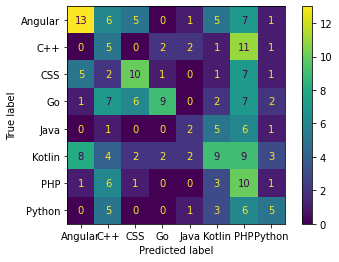

In [82]:
ConfusionMatrixDisplay.from_predictions(test_set2['language'], y_test_preds_language)

## 9. Sentiment analysis sui post che parlano di programmazione

Dopo aver classificato i post provenienti dai vari subreddit, verrà adesso analizzato il **sentiment** ovvero, lo stato d'animo dell'autore quando ha scritto quel determinato post. Alla fine verrà stimata una **media** dei sentiment per vedere se in generale, tramite Reddit gli utenti esprimono le loro problematiche o evidenziano i punti di forza di un linguaggio e lo consigliano.
Per portare a termine questo compito verrà usato l'algoritmo **VADER**, ovvero un algoritmo per la **sentiment analysis** slegato dal dominio delle osservazioni in input e che assegna ad ogni parola un punteggio, basato su statistiche ottenute dalla media di punteggi espressi da dei volontari durante la fase di creazione dell'algoritmo.
Per effettuare l'analisi utilizzando VADER faremo uso della libreria **nltk**.

Come prima cosa è necessario caricare il package di lexicon fornito da vader:

In [83]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rosario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

A questo punto sarà possibile creare l'oggetto **sid** che permetterà di effettuare il **calcolo del sentiment**.

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Prima di procedere con il calcolo del sentiment score, è necessario ai fini di una maggiore comprensione riorganizzare il dataset. A tal proposito sarannoeliminate le colonne "language" e "class" non utili ai fini dell'analisi e verrà inserita la colonna "**predicted_language**" contenente la predizione del linguaggio effettuta dal secondo algoritmo:

In [85]:
SentimentDf = test_set2.copy()

SentimentDf = SentimentDf.assign(predicted_language = y_test_preds_language)
SentimentDf.drop(columns=['language','class'], inplace=True)
SentimentDf

,title,text,predicted_language
6079,Realtime notification in angular 8 and .,I've been trying to find tutorials for realti...,Angular
12444,Best OS for Java dev,I use IntelliJ for java dev (and angular) for ...,Kotlin
12505,I know the JLS is not aimed at mere mort,"**TL;DR** I totally get generics, reference ty...",PHP
331,Pandas Data Cleaner,Little Python package for cleaning Pandas dat...,Kotlin
519,clang with gcc ABI compatibility with -s,Because of earlier post about no-unique-addres...,C++
...,...,...,...
472,How to Use C++20 Modules with Bazel,[https://buildingblock.ai/cpp20-modules-bazel]...,PHP
6074,cant set data to html attr,how to bind data on data-is attr ?\n\n&#x200B;...,Angular
3169,How to lateinit function? Or is it latei,Noobie question is in title,Go
9086,Resources for learning Go aimed at SREs?,"Hi everyone,\n\nI’m sure this gets asked a fai...",Angular


Verrà affiancata al dataframe una nuova colonna che prenderà il nome di **'score'** ottenuta dal lexicon score di vader, in questo modo sarà possibile osservare il post e il rispettivo punteggio.
Calcoliamo per ogni riga del dataframe già filtrato il **compound** del testo associato: VADER ritorna diversi valori in output che rappresentano la percentuale di positività, neutralità e negatività del testo analizzato, il compound non è altro che la media di essi, ovvero il lexicon score effettivo.

In [86]:
rows, cols = SentimentDf.shape
score = []
for i in range(rows):
    score.append(sid.polarity_scores(SentimentDf.iloc[i]['text'])['compound'])

In [87]:
SentimentDf = SentimentDf.assign(score = score)
SentimentDf

,title,text,predicted_language,score
6079,Realtime notification in angular 8 and .,I've been trying to find tutorials for realti...,Angular,0.9251
12444,Best OS for Java dev,I use IntelliJ for java dev (and angular) for ...,Kotlin,0.9670
12505,I know the JLS is not aimed at mere mort,"**TL;DR** I totally get generics, reference ty...",PHP,-0.4023
331,Pandas Data Cleaner,Little Python package for cleaning Pandas dat...,Kotlin,0.5859
519,clang with gcc ABI compatibility with -s,Because of earlier post about no-unique-addres...,C++,0.4071
...,...,...,...,...
472,How to Use C++20 Modules with Bazel,[https://buildingblock.ai/cpp20-modules-bazel]...,PHP,0.0000
6074,cant set data to html attr,how to bind data on data-is attr ?\n\n&#x200B;...,Angular,0.0000
3169,How to lateinit function? Or is it latei,Noobie question is in title,Go,0.0000
9086,Resources for learning Go aimed at SREs?,"Hi everyone,\n\nI’m sure this gets asked a fai...",Angular,0.9890


Il compound è un valore compreso tra -1 e 1, dove 1 indica che il sentiment della frase è totalmente positivo mentre -1 che il sentiment è totalmente negativo.

Come ultimo passaggio dell'analisi è possibile adesso calcolare la media dello score delle valutazioni raggruppate per linguaggio per vedere in generale il sentiment rispetto a quello che sono i post nei subreddit di programmazione: la media sarà superiore allo zero in caso di esito positivo e inferiore nel caso contrario:

In [88]:
dfMean = SentimentDf.groupby('predicted_language').mean()
dfMean

,score
predicted_language,
Angular,0.427857
C++,0.428156
CSS,0.351962
Go,0.296871
Java,0.443000
Kotlin,0.527831
PHP,0.563619
Python,0.433347


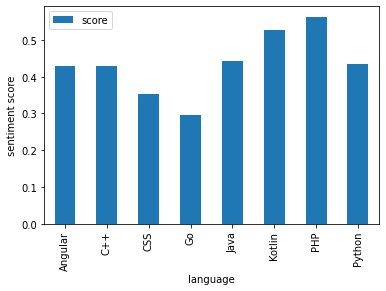

In [89]:
dfMean.plot.bar(y = 'score')
plt.xlabel('language')
plt.ylabel('sentiment score')
a = np.arange(-1,1,0.1)
plt.show()

## 10. Conclusioni

Concludendo, quella ottenuta è una **pipeline** che dato un insieme di post provenienti da Reddit (comunque generalizzabile a qualsiasi fonte) permette di estrarre solo quelli che trattano di programmazione e di analizzarne il sentiment in modo da trarre delle conclusioni e stimare il pensiero degli utenti che fanno uso dei vari linguaggi. Sono state marcate le differenze tra le varie ottimizzazioni che è possibile applicare ad un algoritmo semplice come il kNN che si ricorda essere un algoritmo **lazy**, ovvero un algoritmo la cui fase di training si limita a memorizzare il training set e ad approssimare una pseudofunzione di classificazione solo nel momento in cui viene richiesto di classificare una nuova osservazione. 
Generalizzando, questa catena di processi è utilizzabile ogni qual volta data una quantità di dati generici, si vuole isolare una sola categoria di essi per capire se di quest'ultima si sta parlando positivamente o meno rispetto alle altre. Il processo è applicabile in molti contesti e quello dei post di un social network ne è l'esempio più generale.